### ACF and PACF:

In [1]:
# ACF(Auto Correlation Function) and PACF(Partial Auto Correlation Function) are 2 very useful plot types in TS.

In [2]:
# Correlation is a measure of the strength of the linear relationship b/w 2 variables.
# -1 <= corr <= 1
# If corr is closer to +1, there is +ve linear relationship.
# If corr is closer to -1, there is -ve linear relationship.
# If corr is nearing 0, then weak association.

In [3]:
## ACF:
# -----

# Autocorrelation plot is the correlation of the series with itself, lagged by x time units.
# So, "y axis" is the correlation and the x axis is the number of time units of lag.

# Imagine, we need to determine, How today's sales are correlated to yesterday's sales?
# For this we can compare todays sales data against the sales data shifted by 1 time step.! 

In [4]:
## PACF:
# ------

# PACF helps us determine the correlation of the residual with its previous lag value.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

import statsmodels.api as sm

In [6]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [7]:
# We will be loading 2 datasets. One is non-stationary and other is Stationary.

In [8]:
# Loading non-stationary datasets:

df1 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Airlines.csv", index_col=0, parse_dates=True)

In [10]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
# Since, we need to use statsmodels with it, thus, setting :
df1.index.freq= "MS"

In [13]:
# Now lets load the Stationary dataset:

df2 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\DailyFemaleBirths.csv", index_col=0, parse_dates=True)

In [15]:
df2.index.freq = 'D'

In [17]:
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Lets take an example first:

df = pd.DataFrame({'a':[13,5,11,12,9]})

In [21]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [22]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [24]:
pacf_yw(df['a'],nlags=4,method='mle') # mle is passed in order to use biased ACF coeff.

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [25]:
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [27]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [29]:
# There are different ways of calculating PACF because there are different ways of calculating correlation itself like Pearson correlation etc.

In [31]:
# Coming back to using ACF & PACF in Time Series:

# In TS, we will be plotting ACF and PACF default options from statsmodels.
# Lets discover the plotting capabilities statsmodels has.

In [32]:
from pandas.plotting import lag_plot
# A lag_plot is useful for plotting time series against the lagged version of itself

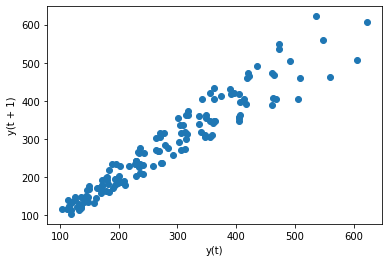

In [33]:
lag_plot(df1['Passengers'])

In [34]:
# If the dataset is non-stationary with upward trend then the neighbouring values should also behave the same way.
# Here we can see the evidence of very strong auto-correlation.
# We can clearly see that there is some correlation between y(t) and its lagged value y(t+1), which indicates AutoCorrelation.

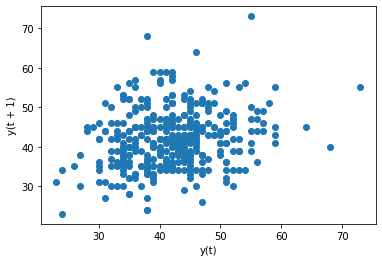

In [35]:
lag_plot(df2['Births'])

In [37]:
# We can notice above that there is no much correlation between y(t) and y(t+1)
# We can also justify it as we cannot expect births on one day to be highly correlated with the previous day or day after!

In [38]:
# Lets use these lag plots to build the full ACF plots:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

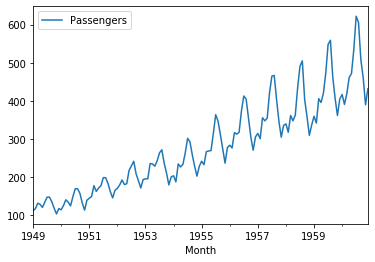

In [40]:
df1.plot()

In [41]:
# We can observe there is clear seasonality and trend. Thus, definately non-stationary.

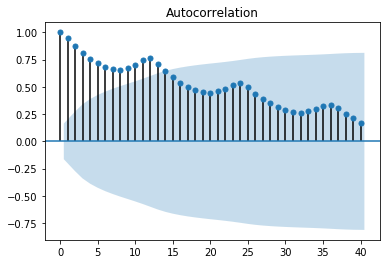

In [46]:
plot_acf(df1['Passengers'], lags=40);

In [49]:
# The blue shaded region represents the 95% confidence interval!
# Basically, its suggesting that correlation values outside this confidence interval are very highly likely to be a correlation!
# Notice, that shaded region gets larger and larger as the lags gets larger and larger.
# Intuitively, we will be more sure of the smaller lag steps for the autocorrelation than the larger lag steps.
# eg: D(t) will be more correlated to D(t-1) and D(t-2) than that of the D(t-10)!

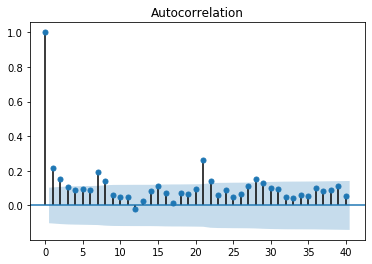

In [51]:
plot_acf(df2['Births'], lags=40);

In [52]:
# In general, PACF plots works best with data that is already stationary.

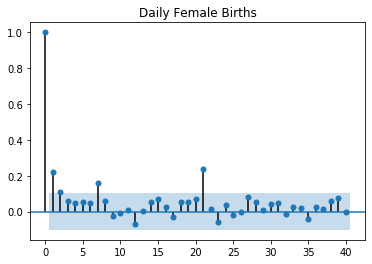

In [54]:
plot_pacf(df2['Births'], lags=40, title="Daily Female Births");

In [ ]:
# later on, we will discuss on how to read and interpret these plots to determine what order parameters for ARIMA model you should be choosing using these plots!

# However, we will also learn about the effective way of choosing AR,I,MA for ARIMA using gridsearch.